 # Customer Churn Prediction for GNB Bank

## 1. Business Understanding:

For GNB Bank, understanding and predicting customer churn is critical for several reasons. First and foremost, customer churn impacts the bank's revenue and profitability. Acquiring new customers is more expensive than retaining existing ones, so preventing churn can lead to significant cost savings. Moreover, customer retention contributes to a positive reputation and strengthens the bank's position in the highly competitive financial industry. By leveraging machine learning techniques to predict customer churn, GNB Bank can proactively address the needs of at-risk customers, personalize their banking experience, and develop targeted marketing campaigns to foster long-term customer loyalty.

## a) Introduction:

GNB Bank is a leading financial institution, providing various banking and financial services to its customers. As with any bank, customer retention is crucial for maintaining a strong market presence and sustaining profitability. Identifying customers who are likely to churn is of paramount importance for GNB Bank to implement targeted strategies and retain valuable customers. In this bprojec, we will explore a dataset containing customer information, including demographics, banking behavior, and historical churn data. Our objective is to build a predictive model that can accurately predict customer churn and provide valuable insights to help GNB Bank enhance its customer retention efforts.

## b) Problem statement
GNB Bank is in constant worry of whether the customer will churn or not. This problem has lead to them unable to make stable and precise decision on the customers that visit, additionally to maintain the already present customers. 

## c) Metric of Success
The model will be counted successful if it can predict accurately whether the customer is likely to churn or not based on their historical behavior and demographic information. 

## d) Main Objective
To build a robust customer churn prediction model that will enable GNB Bank to make data-driven decisions, enhance customer satisfaction, and strengthen its market position in the competitive financial industry.

## e) Specific Objective
* Determine factors that have a higer effect on customer churning.
* Build different models to evaluate the best model.

## f) Experimental design
**Exploratory Data Analysis (EDA):** We will explore the dataset to gain insights into customer demographics, banking behavior, and the distribution of churned customers. EDA will help us understand the data and identify patterns that may be indicative of churn.

**Data Preprocessing:** We will handle missing values, encode categorical variables, and perform feature scaling to prepare the data for model training.

**Feature Importance Analysis:** Using SHAP (SHapley Additive exPlanations), we will identify the most important features that influence customer churn for GNB Bank.

**Model Building:** We will train and evaluate two machine learning models - Decision Trees and Random Forests - to predict customer churn accurately.

**Model Evaluation:** The performance of the models will be assessed using various evaluation metrics, such as accuracy, F1 score, precision, recall, and the ROC-AUC curve.

**Interpretation and Recommendations:** We will interpret the model results to identify key factors contributing to customer churn for GNB Bank. Based on the insights gained, we will provide actionable recommendations to the bank on strategies to reduce churn and improve customer retention.

## g) Data Relevance
This project will use the churn modelling dataset. The dataset has 9970 rows, and 11 columns. The dataset has the following information which will give a better and insight of customer churning.

**1.RowNumber:** A sequential number assigned to each row in the dataset.

**2.CustomerId:** A unique identifier for each customer in the bank.

**3.Surname:** The last name of the customer.

**4.CreditScore:** The credit score of the customer, representing their creditworthiness.

**5.Geography:** The geographical location of the customer (e.g., France, Spain, Germany).

**6.Gender:** The gender of the customer (Male or Female).

**7.Age:** The age of the customer.

**8.Tenure:** The number of years the customer has been with the bank.

**9.Balance:** The account balance of the customer.

**10.NumOfProducts:** The number of bank products the customer has purchased.

**11.HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).

**12.IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).

**13.EstimatedSalary:** The estimated salary of the customer.

**14.Exited:** The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 2. Data Understanding
Explore the data and have its general understanding that is its shape, columns available, is it clean, its relationship using describe function.

##### Import relevant libraries

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


##### Loading the Data

In [244]:
df = pd.read_csv("Churn Modeling_set.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [245]:
df.shape

(10000, 14)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9996 non-null   float64
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9994 non-null   float64
 7   Tenure           9963 non-null   float64
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9986 non-null   float64
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9999 non-null   float64
 12  EstimatedSalary  9988 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


In [247]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9996.000000,9994.000000,9963.000000,9998.000000,9986.000000,9998.000000,9999.000000,9988.000000,10000.000000
mean,5000.50000,1.569094e+07,650.530912,38.923354,5.014554,76473.453397,1.530543,0.705441,0.515052,100085.506746,0.203700
std,2886.89568,7.193619e+04,96.669212,10.490050,2.891654,62397.079186,0.581744,0.455867,0.499798,57520.360859,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.077500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


##### Observation
* The dataset has missing values.
* The mean age of customers is 39 and the standard deviation is 10.49 this indicates that the age is spread around the mean.
* The Exited column(the target column) is binary 1 and 0 with the mean of 0.203 which is suggesting that 20% of the customer exited
* Each column has a relevant data type as expected

## 3. Data Preparation
- Select relevant data to be used.
- Clean and construct the data
- Intergrate and reformat data

##### Select relevant data
Will drop:
* RowNumber - its an index of each row, it wont be necessary factor for customer churning
* CustomerId and Surname - the two are unique custmers identify, definately this has no effect on whether the customer to churn or not.

In [248]:
# Drop irrelevant columns
data = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

##### Clean and construct data

In [249]:
# Check the distribution of the missing data
data.isna().sum()

CreditScore         4
Geography           3
Gender              3
Age                 6
Tenure             37
Balance             2
NumOfProducts      14
HasCrCard           2
IsActiveMember      1
EstimatedSalary    12
Exited              0
dtype: int64

Will drop the missing values in these columns: 'CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'. This is because the number of missing values in the columns are minimal, wont affect the dataset.

In [250]:
# Drop rows with missing values in the "CreditScore" and "Geography" columns
data.dropna(subset=['CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'], inplace=True)

# Check the updated number of missing values in each column
print(data.isna().sum())

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             36
Balance             0
NumOfProducts      14
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


For Tenure and NumProducts will replace the missing values with mode this will help have clear understanding of the most years used and most products used with customers.

In [251]:
# Calculate the mode of the "Tenure" column
tenure_mode = data["Tenure"].mode().values[0]

# Impute the missing values in the "Tenure" column with the mode
data["Tenure"].fillna(tenure_mode, inplace=True)

In [252]:
# Calculate the mode of the "NumOfProducts" column
numofproducts_mode = data["NumOfProducts"].mode().values[0]

# Impute the missing values in the "NumOfProducts" column with the mode
data["NumOfProducts"].fillna(numofproducts_mode, inplace=True)

In [253]:
# Check the updated number of missing values in each column
print(data.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Checking for duplicates

In [254]:
data.duplicated().sum()

0

## 4. Exploratory Data Analysis
* We are to explore the impact of the columns on the exited(which is out target vairable).
* Check multicollinearity using the correltaion plot
* Check the relation of the categorical data on the customers churned(Exited).

### Univariate analysis
Whats the distribution of the Extied column

In [256]:
# Find the unique count of the churned
data.Exited.value_counts()

0    7941
1    2029
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

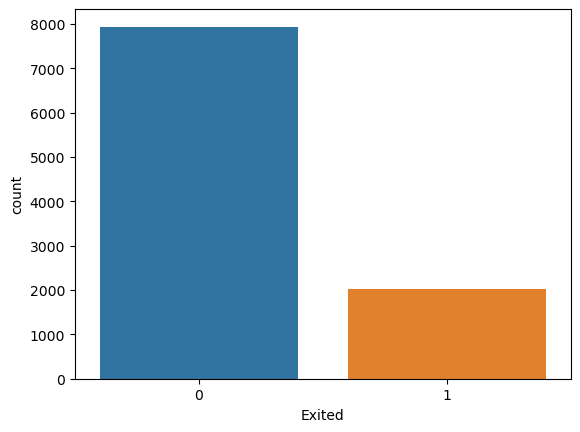

In [257]:
# A bar graph to show the distribution
plt.Figure(figsize=(12,6))
sns.countplot(x='Exited' ,data=data)

**Univariate analysis for numerical columns**

In [258]:
# create a function to run through the dataset and draw count plot with relation to Exited
def draw_count_plot(data, target_variable):

    # We only need numerical columns
    cols = data.select_dtypes(include=['int']).columns.tolist()

    # Loop through the columns
    for col in cols:
        if col != target_variable:
            figsize=(10,5)
           
            fig, axes = plt.subplots(1,2, figsize=figsize)
            
            sns.histplot(data=data, x=data[col], ax=axes[0], hue=data['Exited'], bins=50, kde=True)
            plt.suptitle(f'{col} distribution')
            sns.boxplot(x=data['Exited'], y=data[col], ax=axes[1])
            plt.title(f'{col} vs Exited')
            plt.xlabel('Exited')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
    
draw_count_plot(data, 'Exited')

Box plot to check for outliers in the categorical columns

In [259]:
cols = data.select_dtypes(include=['number']).columns.tolist()

**Univariate analysis for categorical columns**

In [260]:
# Select the categorical columns for univariate analysis
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

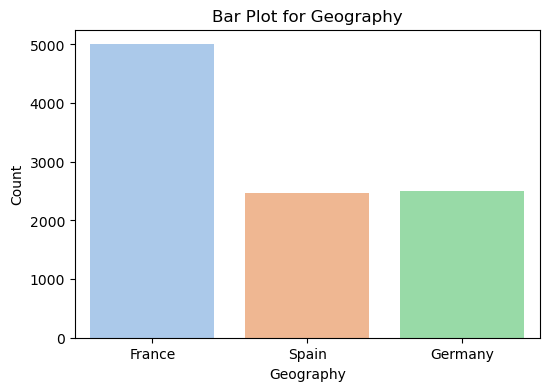

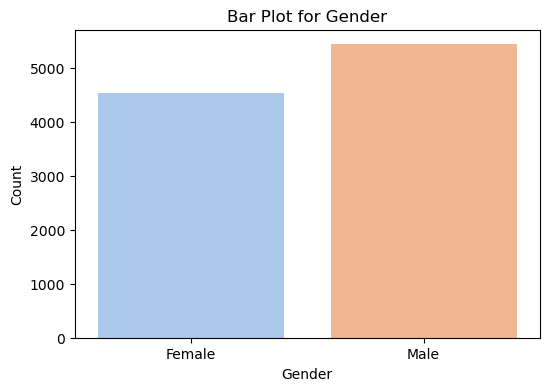

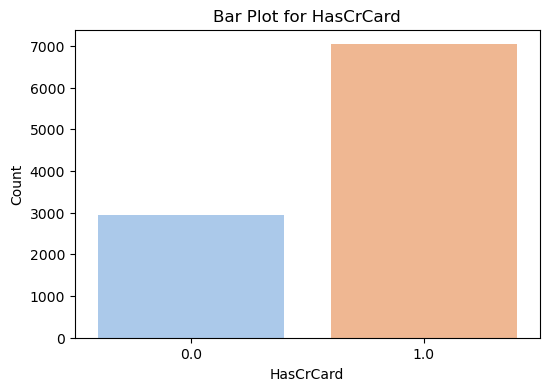

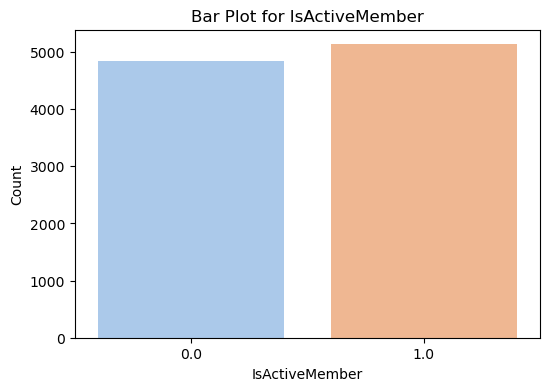

In [261]:
# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, palette='pastel')
    plt.title(f'Bar Plot for {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### Multivariate Analysis
**Between the numerical columns and the target variable**

In [277]:
# Create box plots for each numerical column grouped by the target variable (Exited)
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='Exited', y=column, palette='pastel')
    plt.title(f'Box Plot of {column} by Exited', fontsize=12)
    plt.xlabel('Exited')
    plt.ylabel(column)
    plt.show()

NameError: name 'numerical_columns' is not defined

Check how the churning relates with all other numerical columns

In [263]:
# create a function to run through the dataset and draw count plot with relation to Exited
def draw_count_plot(data, target_variable):

    # We only need numerical columns
    cols = df.select_dtypes(include=['int']).columns.tolist()

    # Loop through the columns
    for col in cols:
        if col != target_variable:
            plt.figure(figsize=(10, 8))
            sns.boxplot(x=data['Exited'], y=data[col])
            plt.title(f'{col} vs Exited')
            plt.xlabel('Exited')
            plt.ylabel(col)
            plt.show()
            
draw_count_plot(data, 'Exited')


### Findings
1. There is no much difference on the credit score on the clients that exited or did not exit.
2. With Age, the older clients are exting more than the younger clients.

### Checking for multicollinearity


C:\Users\Frankline\AppData\Local\Temp\ipykernel_10216\259498397.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


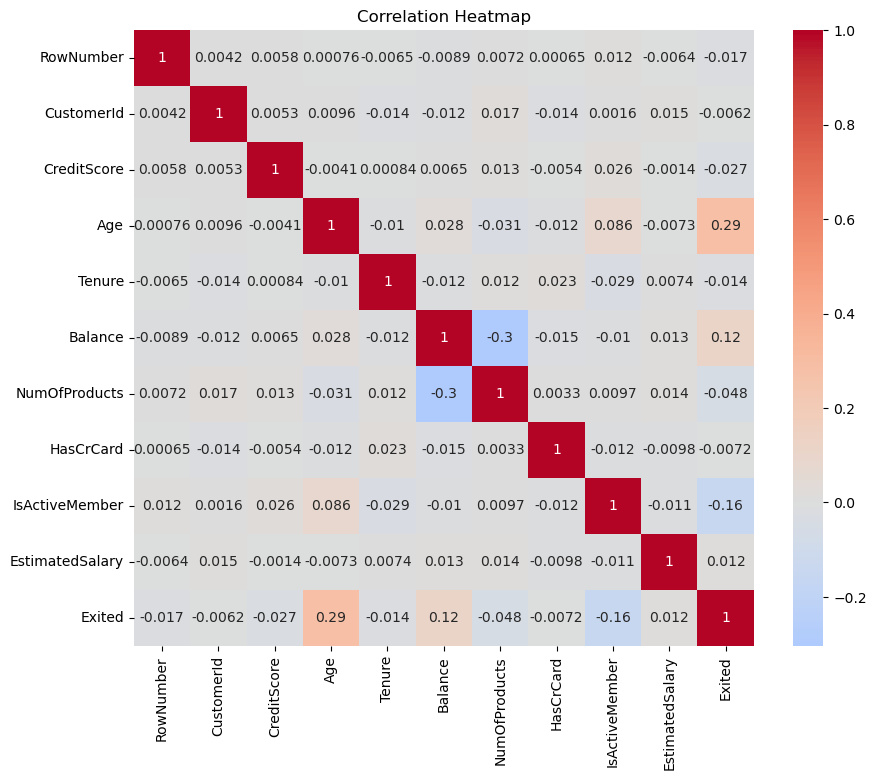

In [265]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Findings
- From the visual heatmap there is no multicollinearity in the dataset.

**Multivariate analyses for categorical columns**

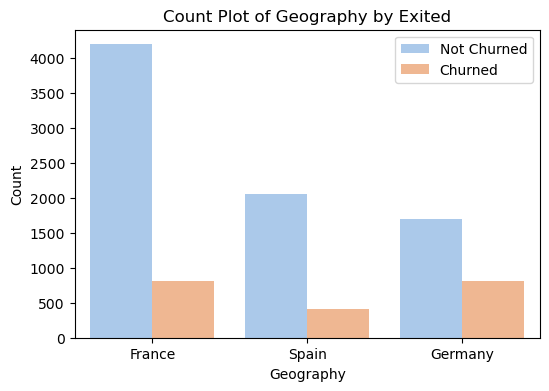

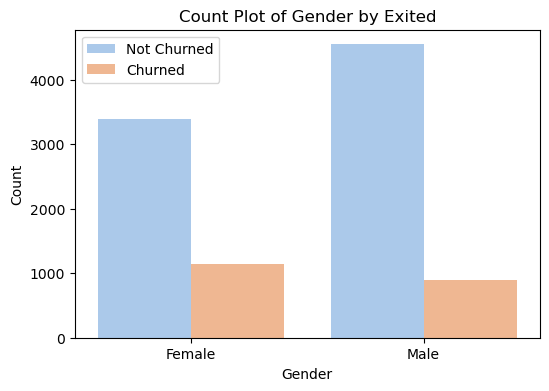

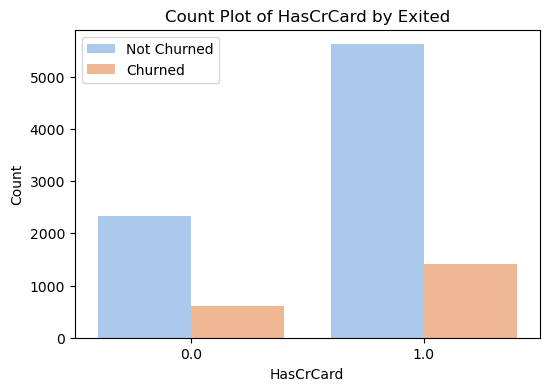

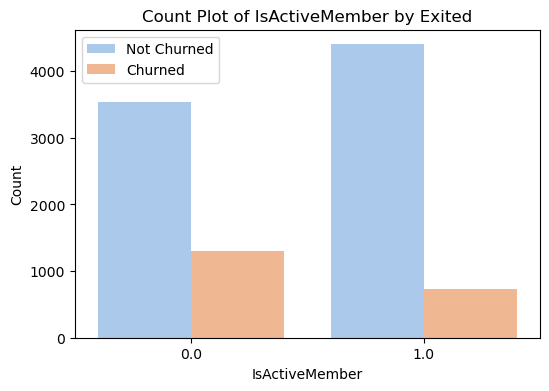

In [266]:
# Create count plots for each categorical column grouped by the target variable (Exited)
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, hue='Exited', palette='pastel')
    plt.title(f'Count Plot of {column} by Exited', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['Not Churned', 'Churned'])
    plt.show()

### Checking for outliers

In [278]:
column_to_check = ['CreditScore']

# Calculate quartiles and IQR
Q1 = data[column_to_check].quantile(0.25)
Q3 = data[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and visualize outliers
outliers = data[(data[column_to_check] < lower_bound) | (data[column_to_check] > upper_bound)]
print("Outliers:")
print(outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data[column_to_check])
plt.title(f"Box Plot of {column_to_check}")
plt.show()

Outliers:
      CreditScore Geography Gender  Age  Tenure  Balance  NumOfProducts  \
0             NaN       NaN    NaN  NaN     NaN      NaN            NaN   
1             NaN       NaN    NaN  NaN     NaN      NaN            NaN   
2             NaN       NaN    NaN  NaN     NaN      NaN            NaN   
3             NaN       NaN    NaN  NaN     NaN      NaN            NaN   
4             NaN       NaN    NaN  NaN     NaN      NaN            NaN   
...           ...       ...    ...  ...     ...      ...            ...   
9995          NaN       NaN    NaN  NaN     NaN      NaN            NaN   
9996          NaN       NaN    NaN  NaN     NaN      NaN            NaN   
9997          NaN       NaN    NaN  NaN     NaN      NaN            NaN   
9998          NaN       NaN    NaN  NaN     NaN      NaN            NaN   
9999          NaN       NaN    NaN  NaN     NaN      NaN            NaN   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0           NaN             Na

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x600 with 0 Axes>

### Feature Engineering

In [268]:
# # Bin 'CreditScore' into three categories: Low, Medium, High
# bins = [0, 600, 700, 850]
# labels = ['Low', 'Medium', 'High']
# data['CreditScore_Category'] = pd.cut(data['CreditScore'], bins=bins, labels=labels)

## Modelling
- Split the data to Train and testing dataset.
- Train and test the dataset with different models and choose the best.
- We will build the following models:

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9970 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9970 non-null   float64
 1   Geography        9970 non-null   object 
 2   Gender           9970 non-null   object 
 3   Age              9970 non-null   float64
 4   Tenure           9970 non-null   float64
 5   Balance          9970 non-null   float64
 6   NumOfProducts    9970 non-null   float64
 7   HasCrCard        9970 non-null   float64
 8   IsActiveMember   9970 non-null   float64
 9   EstimatedSalary  9970 non-null   float64
 10  Exited           9970 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 934.7+ KB


In [270]:
# Split the dataset
# Define the X and the y  variable
X = data.drop(['Geography','Gender','Exited'], axis=1)
y = data['Exited']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [271]:
# Standerdize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [276]:
# Building a Random Forest modelling

# Define the X and the y variable
X = data.drop(['Geography', 'Gender', 'Exited'], axis=1)
y = data['Exited']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8559967910148416
